<a href="https://colab.research.google.com/github/carmentello/labo2025v/blob/main/src/experimento_metricaOptimizacion/Experimento_12_Optimizaciones_Bayesianas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



## 1. Contexto del experimento

Se evaluó el rendimiento de un modelo entrenado mediante **Optimización Bayesiana**, registrando tres métricas para cada configuración de hiperparámetros:

* **AUC**
* **Ganancia** (función de negocio, en unidades monetarias)
* **Accuracy**

El archivo analizado fue:
`Resultados experimento Métrica de Optimización Bayesiana (2).xlsx`, con **11 corridas válidas** (sin NA) para las tres métricas.

---

## 2. Hipótesis

Dado que cada corrida genera un trío de valores *(AUC, Ganancia, Accuracy)* sobre la misma muestra de datos, se utilizaron **tests no paramétricos pareados (Wilcoxon)** para comparar las métricas de a pares.

### 2.1. AUC vs Ganancia

* **H₀₁ (nula):** No hay diferencia significativa entre los valores de AUC y Ganancia.
* **H₁₁ (alternativa):** Sí hay diferencia significativa entre AUC y Ganancia.

### 2.2. AUC vs Accuracy

* **H₀₂:** No hay diferencia significativa entre los valores de AUC y Accuracy.
* **H₁₂:** Sí hay diferencia significativa entre AUC y Accuracy.

### 2.3. Ganancia vs Accuracy

* **H₀₃:** No hay diferencia significativa entre Ganancia y Accuracy.
* **H₁₃:** Sí hay diferencia significativa entre Ganancia y Accuracy.

En los tres casos se utilizó un **nivel de significación α = 0.05**.

---

## 3. Metodología estadística

1. Se leyeron las columnas **AUC, Ganancia y Accuracy** y se eliminaron filas con valores faltantes.

2. Se calculó el **test de Wilcoxon para muestras pareadas** en cada par de métricas:

   ```r
   wilcox.test(AUC, Ganancia,  paired = TRUE, alternative = "two.sided")
   wilcox.test(AUC, Accuracy,  paired = TRUE, alternative = "two.sided")
   wilcox.test(Ganancia, Accuracy, paired = TRUE, alternative = "two.sided")
   ```

3. Se complementó el análisis con:

   * **Estadísticos descriptivos** (media, mediana, rango).
   * **Gráfico de boxplot** de las tres métricas.
   * **Diagramas de dispersión** para cada par de métricas (AUC vs Ganancia, AUC vs Accuracy, Ganancia vs Accuracy).



---

## 4. Resultados numéricos

Estadísticos descriptivos (valores aproximados):

* **AUC**: media ≈ 64 085, mediana ≈ 64 317
* **Ganancia**: media ≈ 62 304, mediana ≈ 62 217
* **Accuracy**: media ≈ 62 621, mediana ≈ 62 621

### 4.1. Test de Wilcoxon

Resultados obtenidos:

* **AUC vs Ganancia**

  * Estadístico: 0
  * **p-value ≈ 0.00098**
  * ⇒ Se **rechaza H₀₁**. Hay diferencia significativa entre AUC y Ganancia.

* **AUC vs Accuracy**

  * Estadístico: 0
  * **p-value ≈ 0.00098**
  * ⇒ Se **rechaza H₀₂**. Hay diferencia significativa entre AUC y Accuracy.

* **Ganancia vs Accuracy**

  * Estadístico: 18
  * **p-value ≈ 0.206**
  * ⇒ **No se rechaza H₀₃**. No se evidencia diferencia significativa entre Ganancia y Accuracy.

---

## 5. Interpretación

1. **AUC vs Ganancia**

   * La diferencia es estadísticamente significativa: los valores de AUC y los de Ganancia no se comportan como meros “re-escalamientos” de lo mismo.
   * Esto indica que **optimizar el modelo según AUC conduce a un patrón de resultados distinto** al de Ganancia: configuraciones que maximizan la capacidad discriminatoria (AUC) no necesariamente maximizan el beneficio económico.

2. **AUC vs Accuracy**

   * Nuevamente la diferencia es significativa.
   * Muestra que **la métrica de clasificación global (Accuracy)** tampoco se alinea perfectamente con la capacidad discriminatoria medida por AUC.
   * Es consistente con la idea de que, en problemas desbalanceados o con distintos costos por error, AUC captura aspectos que Accuracy no refleja.

3. **Ganancia vs Accuracy**

   * No se encontraron diferencias significativas.
   * Esto sugiere que, en este experimento concreto, **Accuracy y Ganancia tienden a moverse en la misma dirección**: cuando la accuracy mejora, la ganancia también suele mejorar y las diferencias no son lo suficientemente grandes como para ser estadísticamente significativas con n=11.

En resumen:

> **AUC se comporta de manera diferente a las métricas de negocio (Ganancia) y a la métrica clásica de clasificación (Accuracy), mientras que Ganancia y Accuracy muestran comportamientos más similares entre sí.**


In [57]:
############################################################
# 1) Cargar librerías
############################################################
install.packages("googlesheets4")
library(googlesheets4)

gs4_auth(cache = FALSE)
library(readxl)
library(tidyverse)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fspreadsheets%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=aff66e28d796feb5bfc1dcbf62ecde40&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWIzMmo5MjhYb2k3b3Nzcjg5S2lhbG5xRmRnR0d5QmhuQ01NQUFiUXJHUkpncVQzazVOZE4zNERyUi1UNDQ2UW16Rl82ZyIsInN0YXRlIjoiYWZmNjZlMjhkNzk2ZmViNWJmYzFkY2JmNjJlY2RlNDAifQ==


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ lubridate 1.9.4     ✔ tibble    3.3.0
✔ purrr     1.2.0     ✔ tidyr     1.3.1
✔ readr     2.1.6     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [59]:


############################################################
# 2) Leer el archivo Excel
############################################################
url <- "https://docs.google.com/spreadsheets/d/1hw0lBZd4kd_T7nx43BiSYGZHMGoiG6_vLVgVLdHEYOs/edit?usp=sharing"
datos <- read_sheet(url)

cat("Primeras filas del dataset:\n")
print(head(datos))

############################################################
# 3) Seleccionar métricas y eliminar NAs
############################################################

datos_m <- datos %>%
  filter(`Quién corrió` %in% c("Carmen", "Cintia")) %>%
  dplyr::select(AUC, Ganancia, Accuracy) %>%
  na.omit()

head(datos_m)


✔ Reading from Resultados experimento Métrica de Optimización Bayesiana.

✔ Range Hoja 1.



Primeras filas del dataset:
# A tibble: 6 × 6
  `Quién corrió` Semilla Envíos   AUC Ganancia Accuracy
  <chr>            <dbl>  <dbl> <dbl>    <dbl>    <dbl>
1 Carmen          310019  10000 63217    62867    62467
2 Carmen          310019  10500 63367    63007    62197
3 Carmen          310019  11000 63667    62657    62537
4 Carmen          310019  11500 62997    62057    62567
5 Carmen          310019  12000 63247    62817    61697
6 Carmen          330017  10000 61307    63647    63427


AUC,Ganancia,Accuracy
<dbl>,<dbl>,<dbl>
63217,62867,62467
63367,63007,62197
63667,62657,62537
62997,62057,62567
63247,62817,61697
61307,63647,63427



===== Test Wilcoxon: AUC vs Ganancia =====

	Wilcoxon signed rank test with continuity correction

data:  datos_m$AUC and datos_m$Ganancia
V = 184, p-value = 0.003383
alternative hypothesis: true location shift is not equal to 0


===== Test Wilcoxon: AUC vs Accuracy =====

	Wilcoxon signed rank test with continuity correction

data:  datos_m$AUC and datos_m$Accuracy
V = 187, p-value = 0.002345
alternative hypothesis: true location shift is not equal to 0


===== Test Wilcoxon: Ganancia vs Accuracy =====

	Wilcoxon signed rank test with continuity correction

data:  datos_m$Ganancia and datos_m$Accuracy
V = 119.5, p-value = 0.6012
alternative hypothesis: true location shift is not equal to 0



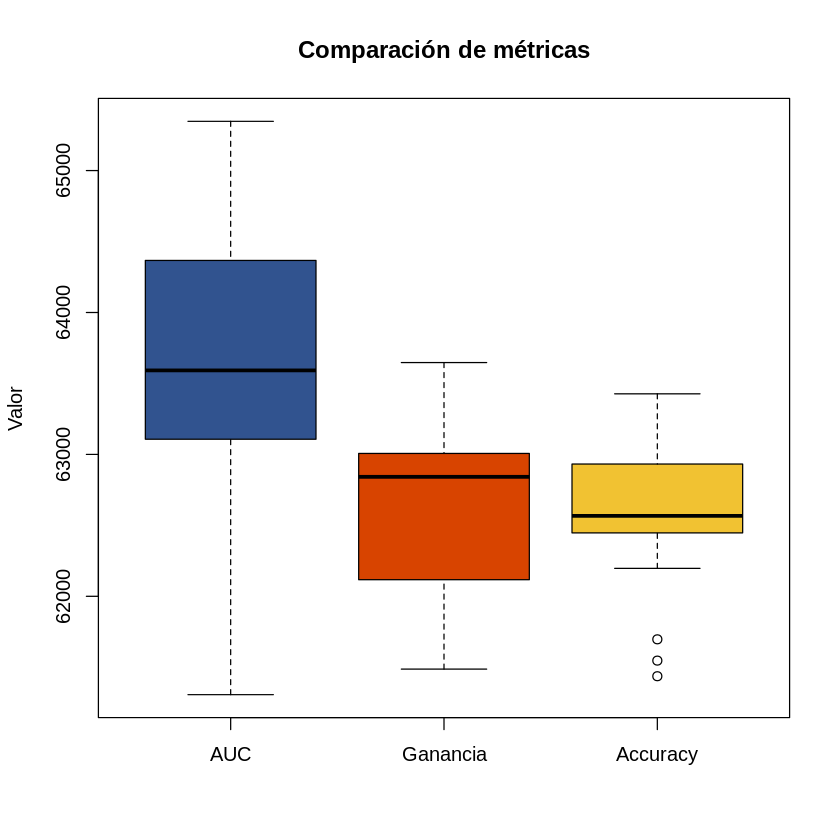

In [60]:

############################################################
# 4) Test de Wilcoxon pareado entre todas las métricas
############################################################

cat("\n===== Test Wilcoxon: AUC vs Ganancia =====\n")
wilcox_auc_gan <- wilcox.test(
  datos_m$AUC, datos_m$Ganancia,
  paired = TRUE, alternative = "two.sided", exact = FALSE
)
print(wilcox_auc_gan)

cat("\n===== Test Wilcoxon: AUC vs Accuracy =====\n")
wilcox_auc_acc <- wilcox.test(
  datos_m$AUC, datos_m$Accuracy,
  paired = TRUE, alternative = "two.sided", exact = FALSE
)
print(wilcox_auc_acc)

cat("\n===== Test Wilcoxon: Ganancia vs Accuracy =====\n")
wilcox_gan_acc <- wilcox.test(
  datos_m$Ganancia, datos_m$Accuracy,
  paired = TRUE, alternative = "two.sided", exact = FALSE
)
print(wilcox_gan_acc)

############################################################
# 5) EXTRA: Boxplots comparativos
############################################################

boxplot(datos_m,
        main = "Comparación de métricas",
        ylab = "Valor",
        col = c("#31538f", "#d84400", "#f1c232"))


Por último, vamos a analizar qué tan costoso computacionalmente es utilizar una métrica personalizada a la hora de correr una Optimización Bayesiana, desde el punto de vista del tiempo promedio que cuesta correrla.

In [69]:

library(ggplot2)
library(tidyverse)

df_acc <- read.table("exp_WFaccuracy_310019_BO_log.txt", header = TRUE, sep = "\t") %>%
  mutate(iteracion = seq(1:nrow(.)), semilla = 310019) %>%
    bind_rows(read.table("exp_WFaccuracy_330017_BO_log.txt", header = TRUE, sep = "\t") %>%
  mutate(iteracion = seq(1:nrow(.)), semilla = 330017))

df_gan <- read.table("exp_WFganancia_310019_BO_log.txt", header = TRUE, sep = "\t") %>%
  mutate(iteracion = seq(1:nrow(.)), semilla = 310019)  %>%
    bind_rows(read.table("exp_WFganancia_330017_BO_log.txt", header = TRUE, sep = "\t") %>%
  mutate(iteracion = seq(1:nrow(.)), semilla = 330017)) %>%
    bind_rows(read.table("exp_WFganancia_320009_BO_log.txt", header = TRUE, sep = "\t") %>%
  mutate(iteracion = seq(1:nrow(.)), semilla = 320009))

df_auc <- read.table("exp_WFauc_310019_BO_log.txt", header = TRUE, sep = "\t") %>%
  mutate(iteracion = seq(1:nrow(.)), semilla = 310019)  %>%
    bind_rows(read.table("exp_WFauc_330017_BO_log.txt", header = TRUE, sep = "\t") %>%
  mutate(iteracion = seq(1:nrow(.)), semilla = 330017)) %>%
    bind_rows(read.table("exp_WFauc_320009_BO_log.txt", header = TRUE, sep = "\t") %>%
  mutate(iteracion = seq(1:nrow(.)), semilla = 320009))

#  head(df_acc)
#  head(df_gan)
#  head(df_auc)

df_acc %>%
  arrange(dob)

learning_rate,feature_fraction,coverage,leaf_size,y,dob,eol,error.message,exec.time,ei,error.model,train.time,prop.type,propose.time,se,mean,num_iterations,iteracion,semilla
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<lgl>,<lgl>,<dbl>,<dbl>,<lgl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>
0.03238639,0.12962257,0.30962053,0.192282026,0.9803580,0,NA,NA,308.294,NA,NA,NA,initdesign,NA,NA,NA,2048,29,310019
0.05328021,0.08838632,0.91616911,0.035639777,0.9794163,0,NA,NA,277.360,NA,NA,NA,initdesign,NA,NA,NA,1610,35,310019
0.25400718,0.27820975,0.77950530,0.139046484,0.9793312,0,NA,NA,155.412,NA,NA,NA,initdesign,NA,NA,NA,600,37,310019
0.12381825,0.66032929,0.06785211,0.185302650,0.9790700,0,NA,NA,205.366,NA,NA,NA,initdesign,NA,NA,NA,2010,44,310019
0.13539119,0.39191595,0.51366741,0.150829310,0.9788512,0,NA,NA,379.849,NA,NA,NA,initdesign,NA,NA,NA,1572,45,310019
0.06041321,0.42562478,0.98075636,0.162791993,0.9786994,0,NA,NA,459.080,NA,NA,NA,initdesign,NA,NA,NA,2025,46,310019
0.15610961,0.26056971,0.55304037,0.120116297,0.9786811,0,NA,NA,286.735,NA,NA,NA,initdesign,NA,NA,NA,1307,47,310019
0.21428797,0.72063244,0.60149593,0.136325143,0.9785961,0,NA,NA,139.524,NA,NA,NA,initdesign,NA,NA,NA,1108,48,310019
0.23941226,0.88093256,0.38452261,0.057526409,0.9785232,0,NA,NA,109.959,NA,NA,NA,initdesign,NA,NA,NA,735,49,310019


In [73]:

options(scipen=99)

df_all <- df_acc %>% filter(dob > 0) %>%
  select(dob, semilla, accuracy = y, tiempo_acc = exec.time) %>%
  left_join(df_auc %>% filter(dob > 0) %>%
  select(dob, semilla, auc = y, tiempo_auc = exec.time), by=c("semilla", "dob"))%>%
  left_join(df_gan %>% filter(dob > 0) %>%
  select(dob, semilla, ganancia = y, tiempo_gan = exec.time), by=c("semilla", "dob"))

df_all


dob,semilla,accuracy,tiempo_acc,auc,tiempo_auc,ganancia,tiempo_gan
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
23,310019,0.9811113,252.144,0.9383162,82.922,123498000,64.398
39,310019,0.9811113,245.415,0.9384381,231.349,125658000,70.270
20,310019,0.9810688,253.576,0.9383288,112.295,122418000,74.299
9,310019,0.9810020,262.202,0.9380630,81.400,124818000,114.612
37,310019,0.9809594,245.938,0.9393030,202.188,125778000,83.997
3,310019,0.9809108,333.442,0.9362592,141.195,123738000,63.108
27,310019,0.9809108,265.272,0.9379659,97.664,124458000,172.824
30,310019,0.9808744,251.973,0.9373521,76.411,126378000,50.249
5,310019,0.9808683,254.771,0.9352032,256.323,125178000,151.436


In [81]:
promedio_semilla <- df_all %>%
  #pivot_longer(cols = c("tiempo_acc", "tiempo_gan", "tiempo_auc")) %>%
  group_by(semilla) %>%
  summarise(tiempo_acc = sum(tiempo_acc)/(60*60),
            tiempo_gan = sum(tiempo_gan)/(60*60),
            tiempo_auc = sum(tiempo_auc)/(60*60))

promedio_semilla %>%
  summarise(tiempo_acc = mean(tiempo_acc),
            tiempo_gan = mean(tiempo_gan),
            tiempo_auc = mean(tiempo_auc))

tiempo_acc,tiempo_gan,tiempo_auc
<dbl>,<dbl>,<dbl>
2.685758,1.99221,2.213611
